In [1]:
#using Revise
addprocs(4)
using LightDarkPOMDPs, CMDPs
using POMDPs, POMDPToolbox, MCTS
using DataFrames
using Plots; gr()

Plots.GRBackend()

In [2]:
mdp = LightDark2D()
b = DPWBandit(mdp)
solver = ModularSolver(mdp, b)
policy = solve(solver, mdp);

In [3]:
s0 = initial_state(mdp, Base.GLOBAL_RNG)

2-element StaticArrays.SArray{Tuple{2},Float64,1,2}:
 2.0
 2.0

In [4]:
hr = HistoryRecorder(; max_steps=10, rng=Base.GLOBAL_RNG)
h = simulate(hr, mdp, policy, s0);

In [5]:
h.state_hist

11-element Array{StaticArrays.SArray{Tuple{2},Float64,1,2},1}:
 [2.0, 2.0]            
 [1.17935, 1.17518]    
 [0.677345, 0.448504]  
 [-0.106256, 0.137474] 
 [-0.0808282, 0.186257]
 [0.738931, -0.143743] 
 [0.404034, -0.920661] 
 [0.0937087, 0.0985183]
 [0.0733585, 0.0336499]
 [0.703486, 0.0212723] 
 [0.00822193, 0.349441]

In [6]:
h.action_hist

10-element Array{StaticArrays.SArray{Tuple{2},Float64,1,2},1}:
 [-0.820649, -0.824823]  
 [-0.502006, -0.726674]  
 [-0.783602, -0.31103]   
 [0.0254282, 0.0487832]  
 [0.81976, -0.330001]    
 [-0.334898, -0.776918]  
 [-0.310325, 1.01918]    
 [-0.0203502, -0.0648684]
 [0.630127, -0.0123776]  
 [-0.695264, 0.328169]   

In [7]:
h.reward_hist

10-element Array{Float64,1}:
 -4.6769   
 -1.77599  
 -0.685362 
 -0.016608 
 -0.411066 
 -0.64122  
 -1.07294  
 -0.0115546
 -0.201864 
 -0.543216 

In [8]:
## Study

In [9]:
study = RewardvsN(LightDark2D)

CMDPs.RewardvsN
  mdp: LightDarkPOMDPs.LightDark2D
  bandits: Array{DataType}((3,))
  n_seeds: Int64 200
  n_iters: Array{Int64}((7,)) [50, 100, 200, 500, 1000, 1500, 2000]
  max_steps: Int64 10


In [10]:
result = run_study(study)

CMDPs.RewardvsNResult("LightDark2D", 4200×4 DataFrames.DataFrame
│ Row  │ alg        │ seed │ n_iters │ r_total  │
├──────┼────────────┼──────┼─────────┼──────────┤
│ 1    │ DPWBandit  │ 1    │ 50      │ -11.2386 │
│ 2    │ DPWBandit  │ 2    │ 50      │ -12.0235 │
│ 3    │ DPWBandit  │ 3    │ 50      │ -8.65549 │
│ 4    │ DPWBandit  │ 4    │ 50      │ -12.5248 │
│ 5    │ DPWBandit  │ 5    │ 50      │ -11.9667 │
│ 6    │ DPWBandit  │ 6    │ 50      │ -12.5598 │
│ 7    │ DPWBandit  │ 7    │ 50      │ -9.29834 │
│ 8    │ DPWBandit  │ 8    │ 50      │ -12.2591 │
│ 9    │ DPWBandit  │ 9    │ 50      │ -13.8315 │
│ 10   │ DPWBandit  │ 10   │ 50      │ -11.9884 │
│ 11   │ DPWBandit  │ 11   │ 50      │ -10.0749 │
⋮
│ 4189 │ CBTSBandit │ 189  │ 2000    │ -10.3583 │
│ 4190 │ CBTSBandit │ 190  │ 2000    │ -9.65299 │
│ 4191 │ CBTSBandit │ 191  │ 2000    │ -7.67453 │
│ 4192 │ CBTSBandit │ 192  │ 2000    │ -8.0918  │
│ 4193 │ CBTSBandit │ 193  │ 2000    │ -7.99943 │
│ 4194 │ CBTSBandit │ 194  │ 2000

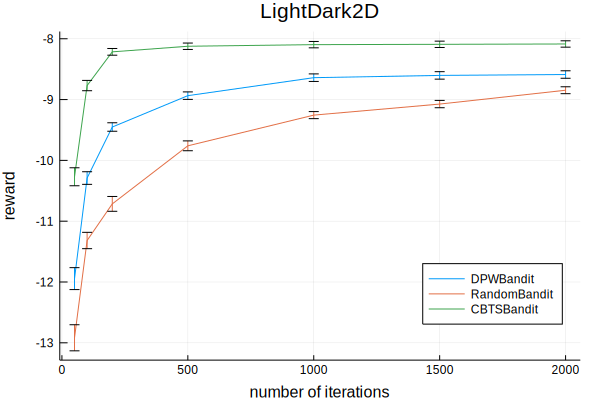

In [11]:
p=plot(result)

In [12]:
savefig(p, "./RvN_lightdark2d.pdf")